In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
server_test_results_raw = pd.read_csv("../test_server_results.csv")
server_test_results_raw.head()

,accuracy,round,timestamp,session_uuid
0,0.916889,1,2023-07-14 20:04:23.596545,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,0.941867,2,2023-07-14 20:04:32.373940,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,0.952178,3,2023-07-14 20:04:41.094058,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,0.961067,4,2023-07-14 20:04:50.319609,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,0.962756,5,2023-07-14 20:04:58.850636,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [16]:
client_test_results_raw = pd.read_csv("../test_client_results.csv")
client_test_results_raw.head()

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9160,0.307644,1,2023-07-14 20:04:23.089550,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.9056,0.311643,1,2023-07-14 20:04:23.118554,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,76a83e36-3488-4ac0-a9e9-1f5aff89a062,localhost,1883,0.9200,0.277598,1,2023-07-14 20:04:23.144553,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,7c4635c3-5948-4889-8f9a-ea35919d96e2,localhost,1883,0.9208,0.304338,1,2023-07-14 20:04:23.236561,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,9f3121fd-7d4d-4d7a-9cb2-0468d63b6f52,localhost,1883,0.9128,0.294131,1,2023-07-14 20:04:23.281552,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [17]:
client_train_results_raw = pd.read_csv("../train_client_results.csv")
client_train_results_raw.head()

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.795667,0.639913,1,2023-07-14 20:04:17.913314,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.770000,0.702311,1,2023-07-14 20:04:17.929304,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,00bf3ee2-fb7b-45df-bc9b-2b061ec95402,localhost,1883,0.791667,0.668800,1,2023-07-14 20:04:17.977335,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,76a83e36-3488-4ac0-a9e9-1f5aff89a062,localhost,1883,0.781667,0.670683,1,2023-07-14 20:04:17.982306,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,56f969a0-12d1-46e9-ac27-6706e6a5fbfb,localhost,1883,0.783000,0.685048,1,2023-07-14 20:04:18.204192,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [19]:
SESSION_ID = 'dd2bdfce-0c42-4360-9886-7ca3ce305375'

In [20]:
client_train_results_df = client_train_results_raw[client_train_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)
client_test_results_df = client_test_results_raw[client_test_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)
server_test_results_df = server_test_results_raw[server_test_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)

In [21]:
client_train_results_df.head()

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.795667,0.639913,1,2023-07-14 20:04:17.913314,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.770000,0.702311,1,2023-07-14 20:04:17.929304,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,00bf3ee2-fb7b-45df-bc9b-2b061ec95402,localhost,1883,0.791667,0.668800,1,2023-07-14 20:04:17.977335,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,76a83e36-3488-4ac0-a9e9-1f5aff89a062,localhost,1883,0.781667,0.670683,1,2023-07-14 20:04:17.982306,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,56f969a0-12d1-46e9-ac27-6706e6a5fbfb,localhost,1883,0.783000,0.685048,1,2023-07-14 20:04:18.204192,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [22]:
client_train_results_per_trainer = [client_train_results_df[client_train_results_df['uuid'] == uuid] for uuid in client_train_results_df['uuid'].unique()]

In [23]:
client_train_results_per_trainer[0]

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.795667,0.639913,1,2023-07-14 20:04:17.913314,dd2bdfce-0c42-4360-9886-7ca3ce305375
10,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.890667,0.337667,2,2023-07-14 20:04:27.166893,dd2bdfce-0c42-4360-9886-7ca3ce305375
17,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.923667,0.236729,3,2023-07-14 20:04:35.790868,dd2bdfce-0c42-4360-9886-7ca3ce305375
25,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.937000,0.215023,4,2023-07-14 20:04:44.235356,dd2bdfce-0c42-4360-9886-7ca3ce305375
33,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.944000,0.182054,5,2023-07-14 20:04:53.966081,dd2bdfce-0c42-4360-9886-7ca3ce305375
40,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.959000,0.138660,6,2023-07-14 20:05:02.114435,dd2bdfce-0c42-4360-9886-7ca3ce305375
55,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.965333,0.131508,8,2023-07-14 20:05:19.963095,dd2bdfce-0c42-4360-9886-7ca3ce305375
63,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.971333,0.097275,9,2023-07-14 20:05:28.325500,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [24]:
client_test_results_per_trainer = [client_test_results_df[client_test_results_df['uuid'] == uuid].reset_index(drop=True) for uuid in client_test_results_df['uuid'].unique()]

In [25]:
client_test_results_per_trainer[0]

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9160,0.307644,1,2023-07-14 20:04:23.089550,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9344,0.225521,2,2023-07-14 20:04:32.088084,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9552,0.153224,3,2023-07-14 20:04:40.971064,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9520,0.161844,4,2023-07-14 20:04:50.126945,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9632,0.124262,5,2023-07-14 20:04:58.566655,dd2bdfce-0c42-4360-9886-7ca3ce305375
5,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9688,0.103382,6,2023-07-14 20:05:07.194962,dd2bdfce-0c42-4360-9886-7ca3ce305375
6,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9728,0.087426,7,2023-07-14 20:05:15.678620,dd2bdfce-0c42-4360-9886-7ca3ce305375
7,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9712,0.093771,8,2023-07-14 20:05:24.394840,dd2bdfce-0c42-4360-9886-7ca3ce305375
8,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9840,0.071863,9,2023-07-14 20:05:33.061337,dd2bdfce-0c42-4360-9886-7ca3ce305375
9,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9784,0.072117,10,2023-07-14 20:05:41.973005,dd2bdfce-0c42-4360-9886-7ca3ce305375


## Analysing training results

IndexError: list index out of range

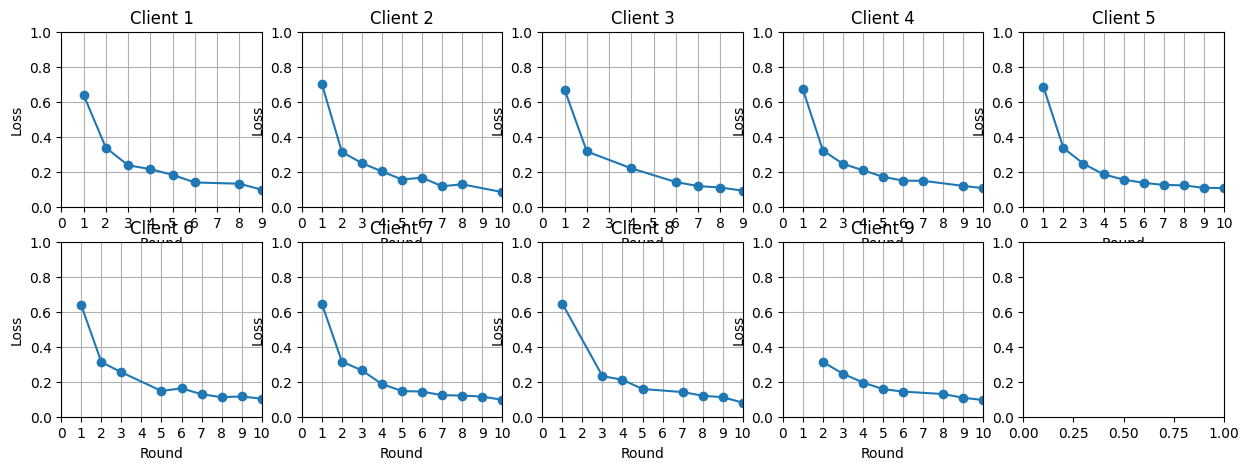

In [29]:
row = 2
col = 5

fig, axs = plt.subplots(row, col, figsize=(15, 5))

for i in range(row):
    for j in range(col):
        print(i, j)
        if i == 1 and j == 4:
            print("hi")
            break
        axs[i, j].plot(client_train_results_per_trainer[i*col + j]['round'], client_train_results_per_trainer[i*col + j]['loss'], marker='o')
        axs[i, j].set_title(f"Client {i*col + j + 1}")
        axs[i, j].set_xlabel("Round")
        axs[i, j].set_ylabel("Loss")
        axs[i, j].set_ylim(0, 1)
        axs[i, j].set_xlim(0, max(client_train_results_per_trainer[i*col + j]['round']))
        axs[i, j].set_xticks(range(0, max(client_train_results_per_trainer[i*col + j]['round']) + 1, 1))
        axs[i, j].grid()

fig.tight_layout()
plt.savefig(f"train_loss_{SESSION_ID}.png")

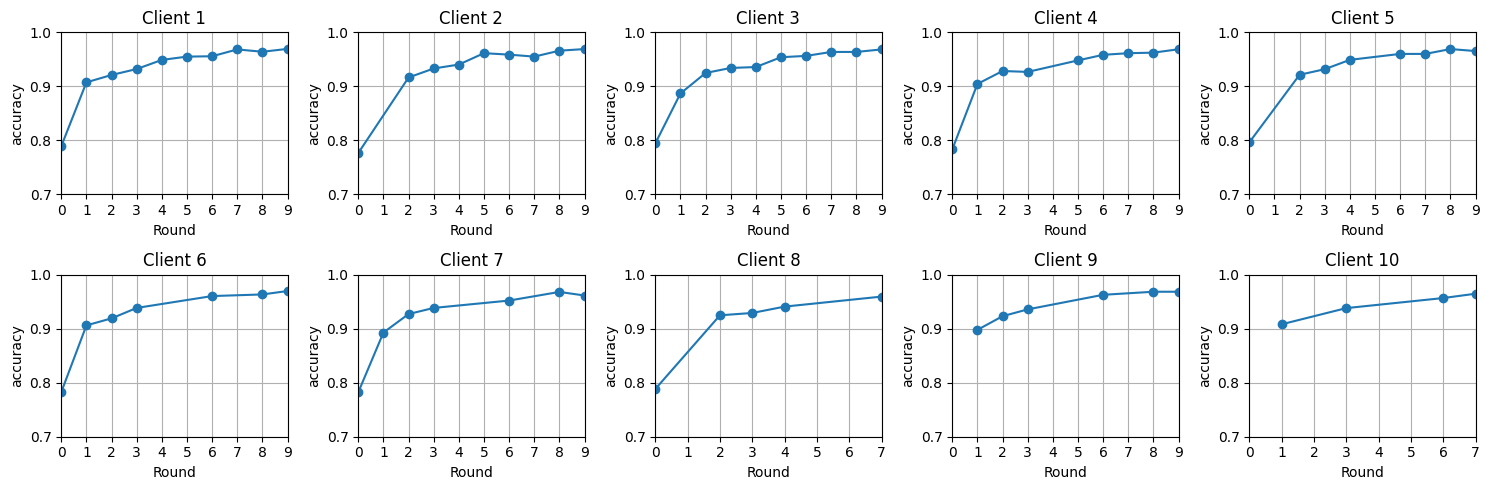

In [ ]:
row = 2
col = 5

fig, axs = plt.subplots(row, col, figsize=(15, 5))

for i in range(row):
    for j in range(col):
        axs[i, j].plot(client_train_results_per_trainer[i*col + j]['round'], client_train_results_per_trainer[i*col + j]['accuracy'], marker='o')
        axs[i, j].set_title(f"Client {i*col + j + 1}")
        axs[i, j].set_xlabel("Round")
        axs[i, j].set_ylabel("accuracy")
        axs[i, j].set_ylim(0.7, 1)
        axs[i, j].set_xlim(0, max(client_train_results_per_trainer[i*col + j]['round']))
        axs[i, j].set_xticks(range(0, max(client_train_results_per_trainer[i*col + j]['round']) + 1, 1))
        axs[i, j].grid()

fig.tight_layout()
plt.savefig(f"train_acc_{SESSION_ID}.png")

## Analysing server test results

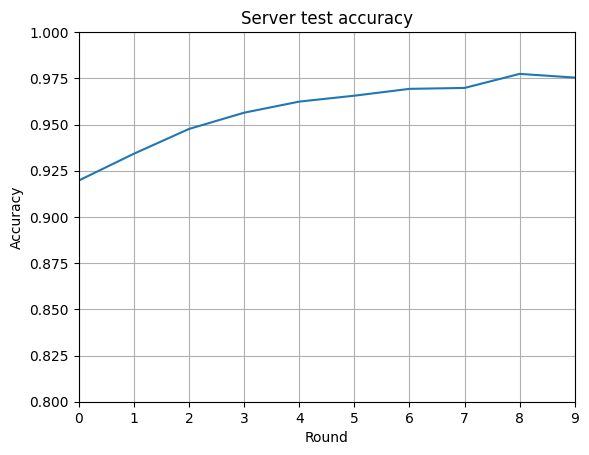

In [ ]:
plt.plot(server_test_results_df['round'], server_test_results_df['accuracy'])
plt.title("Server test accuracy")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.xlim(0, max(server_test_results_df['round']))
plt.grid()

plt.savefig(f"server_test_acc_{SESSION_ID}.png")


## Analyzing test results for different amount of rounds

In [ ]:
server_test_results_10df = server_test_results_df

In [ ]:
server_test_results_20df = server_test_results_raw[server_test_results_raw['session_uuid'] == 'f7ba8079-9c60-4f21-ab92-f4715fa4c1e9'].reset_index(drop=True)
server_test_results_40df = server_test_results_raw[server_test_results_raw['session_uuid'] == '43a1bcbf-ce48-42c2-b5b3-fb48d8685482'].reset_index(drop=True)

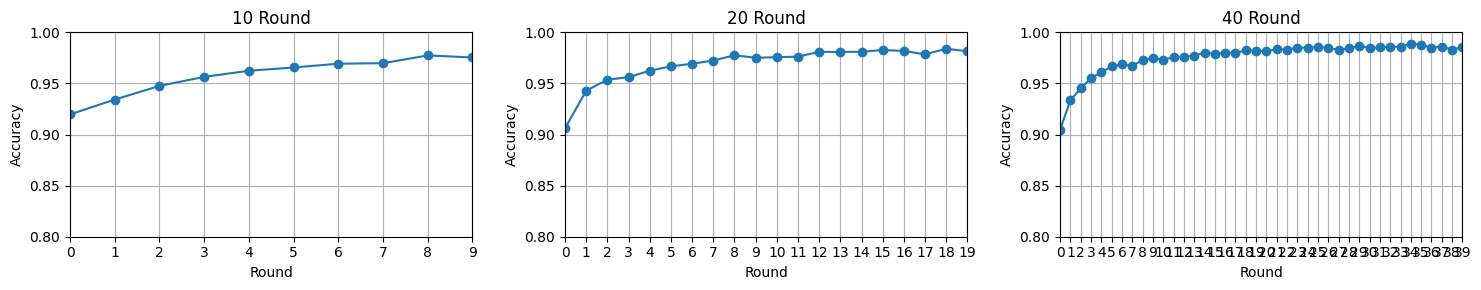

In [ ]:
col = 3
row = 1

fig, axs = plt.subplots(row, col, figsize=(15, 3))

axs[0].plot(server_test_results_10df['round'], server_test_results_10df['accuracy'], marker='o')
axs[0].set_title("10 Round")
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Accuracy")
axs[0].set_ylim(0.8, 1)
axs[0].set_xlim(0, max(server_test_results_10df['round']))
axs[0].set_xticks(range(0, max(server_test_results_10df['round']) + 1, 1))
axs[0].grid()

axs[1].plot(server_test_results_20df['round'], server_test_results_20df['accuracy'], marker='o')
axs[1].set_title("20 Round")
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim(0.8, 1)
axs[1].set_xlim(0, max(server_test_results_20df['round']))
axs[1].set_xticks(range(0, max(server_test_results_20df['round']) + 1, 1))
axs[1].grid()

axs[2].plot(server_test_results_40df['round'], server_test_results_40df['accuracy'], marker='o')
axs[2].set_title("40 Round")
axs[2].set_xlabel("Round")
axs[2].set_ylabel("Accuracy")
axs[2].set_ylim(0.8, 1)
axs[2].set_xlim(0, max(server_test_results_40df['round']))
axs[2].set_xticks(range(0, max(server_test_results_40df['round']) + 1, 1))
axs[2].grid()

fig.tight_layout()

plt.savefig(f"server_test_acc_10_20_40.png")